# Package Walkthrough

## Imports

First, everything local from the `ccna/` directory.

In [1]:
import sys
sys.path.append("../")
from ccna.policy_net import PolicyNet
from ccna.influence_passivity import IP
from ccna.change_point import *

Next, we'll import other packages for data processing and visualization.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Now, our data import is handled automatically (assuming the directories are set up correctly) by our 'PolicyNet' package.

In [3]:
pn = PolicyNet("../")

## PolicyNet (base functionality)

Here, we'll test out some of the basic features inherited from the 'PolicyNet' package such as subgraphs and temporal metrics. Let's start by running temporal_metrics() on our entire graph (all policies).

In [4]:
pn.temporal_metrics(pn.G)

,Countries,Policies,Edges,Butterflies,Caterpillars,Ratio,Year
0,2,1,2,0,0,0.000000,1985
1,1,1,1,0,0,0.000000,1986
2,1,1,1,0,0,0.000000,1987
3,0,0,0,0,0,0.000000,1988
4,0,0,0,0,0,0.000000,1989
5,0,0,0,0,0,0.000000,1990
6,1,1,1,0,0,0.000000,1991
7,2,1,2,0,0,0.000000,1992
8,2,1,2,0,0,0.000000,1993
9,1,1,1,0,0,0.000000,1994


By calling `return_subgraph_policy()` we can get a 'NetworkX' bipartite graph where...

In [5]:
subgraph1 = pn.return_subgraph_policy(pn.G, {"Environmental Taxes"})

In [6]:
pn.temporal_metrics(subgraph1, 2010, 2020)

,Countries,Policies,Edges,Butterflies,Caterpillars,Ratio,Year
0,89,5,314,11638,60309,0.192973,2010
1,90,5,313,11364,59347,0.191484,2011
2,88,5,313,11599,59888,0.193678,2012
3,88,5,313,11497,59633,0.192796,2013
4,89,5,318,12019,62034,0.193749,2014
5,118,5,429,22819,115525,0.197524,2015
6,118,5,426,22389,113601,0.197085,2016
7,116,5,424,22396,113038,0.198128,2017
8,114,5,417,21738,109416,0.198673,2018
9,112,5,401,19395,99241,0.195433,2019


### Influence Passivity

Let's create the influence passivity graph for environmental taxes to test our code implementation. First we need to create our influence graph for our policy subgraph. Then we can load it into the IP algorithm.

In [30]:
subgraph1 = pn.return_subgraph_policy(pn.G, {"Environmental Taxes"})
influence_graph = pn.influence_graph(subgraph1)
ip = IP(influence_graph)
countries = [pn.two_way_country_lookup[c] for c in ip.countries] # rename

We'll run 100 iterations.

In [31]:
M = 100
ip.iterate(M)
influence = ip.influence[M-1]
passivity = ip.passivity[M-1]

Now we'll plot our convergence.

Text(0.5, 1.0, 'Convergence of IP Algorithm')

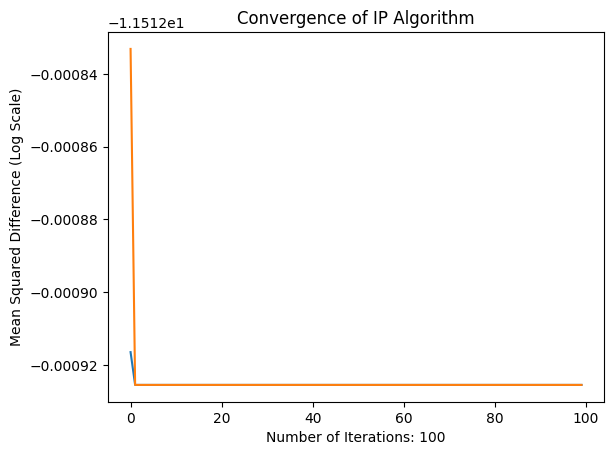

In [39]:
x = range(M)
y_i, y_p = ip.chart_convergence()
plt.plot(x, np.log(y_i + 0.00001))
plt.plot(x, np.log(y_p + 0.00001))
plt.xlabel("Number of Iterations: " + str(M))
plt.ylabel("Mean Squared Difference (Log Scale)")
plt.title("Convergence of IP Algorithm")

Now let's look at our results.

In [14]:
top_influencers = pd.DataFrame({"Country": countries, "Influence": influence,\
                                "Passivity": passivity}).sort_values('Influence', ascending=False).head(10)
top_influencers

,Country,Influence,Passivity
52,Serbia,0.013970,0.008170
86,Poland,0.012445,0.008225
18,Lithuania,0.012270,0.008225
27,China,0.012250,0.008182
39,Cape Verde,0.012159,0.008207
103,Côte d'Ivoire,0.012084,0.008235
49,Czech Republic,0.012002,0.008225
31,Finland,0.012002,0.008225
32,Hungary,0.012002,0.008225
35,Netherlands,0.012002,0.008225


In [16]:
most_passive = pd.DataFrame({"Country": countries, "Influence": influence,\
                                "Passivity": passivity}).sort_values('Passivity', ascending=False).head(10)
most_passive

,Country,Influence,Passivity
23,Malaysia,0.008632,0.008308
48,Bahamas,0.008834,0.008286
64,Ecuador,0.009102,0.008278
84,Belize,0.009276,0.008270
53,Greece,0.009442,0.008243
94,Iceland,0.010683,0.008236
103,Côte d'Ivoire,0.012084,0.008235
5,Ukraine,0.008323,0.008230
38,Guyana,0.010667,0.008226
0,Denmark,0.012002,0.008225
